## Setup


In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


In [ ]:
df = pd.read_csv('../data/Taxi_final_1M_clean.csv')
zones = pd.read_csv('../data/taxi_zones.csv')

df.shape, zones.shape

((967493, 17), (265, 4))

### Top 20 Locations

In [102]:
pickup_counts = df['PULocationID'].value_counts().head(20)
pickup_with_zones = pickup_counts.to_frame('count').join(
    zones.set_index('LocationID')[['Borough', 'Zone']]
)
pickup_with_zones['percentage'] = (pickup_with_zones['count'] / len(df) * 100).round(2)

dropoff_counts = df['DOLocationID'].value_counts().head(20)
dropoff_with_zones = dropoff_counts.to_frame('count').join(
    zones.set_index('LocationID')[['Borough', 'Zone']]
)
dropoff_with_zones['percentage'] = (dropoff_with_zones['count'] / len(df) * 100).round(2)

pickup_with_zones

,count,Borough,Zone,percentage
PULocationID,,,,
132,49758,Queens,JFK Airport,5.14
237,45624,Manhattan,Upper East Side South,4.72
161,45006,Manhattan,Midtown Center,4.65
236,41096,Manhattan,Upper East Side North,4.25
162,34569,Manhattan,Midtown East,3.57
186,33505,Manhattan,Penn Station/Madison Sq West,3.46
138,33296,Queens,LaGuardia Airport,3.44
230,32216,Manhattan,Times Sq/Theatre District,3.33
142,31993,Manhattan,Lincoln Square East,3.31


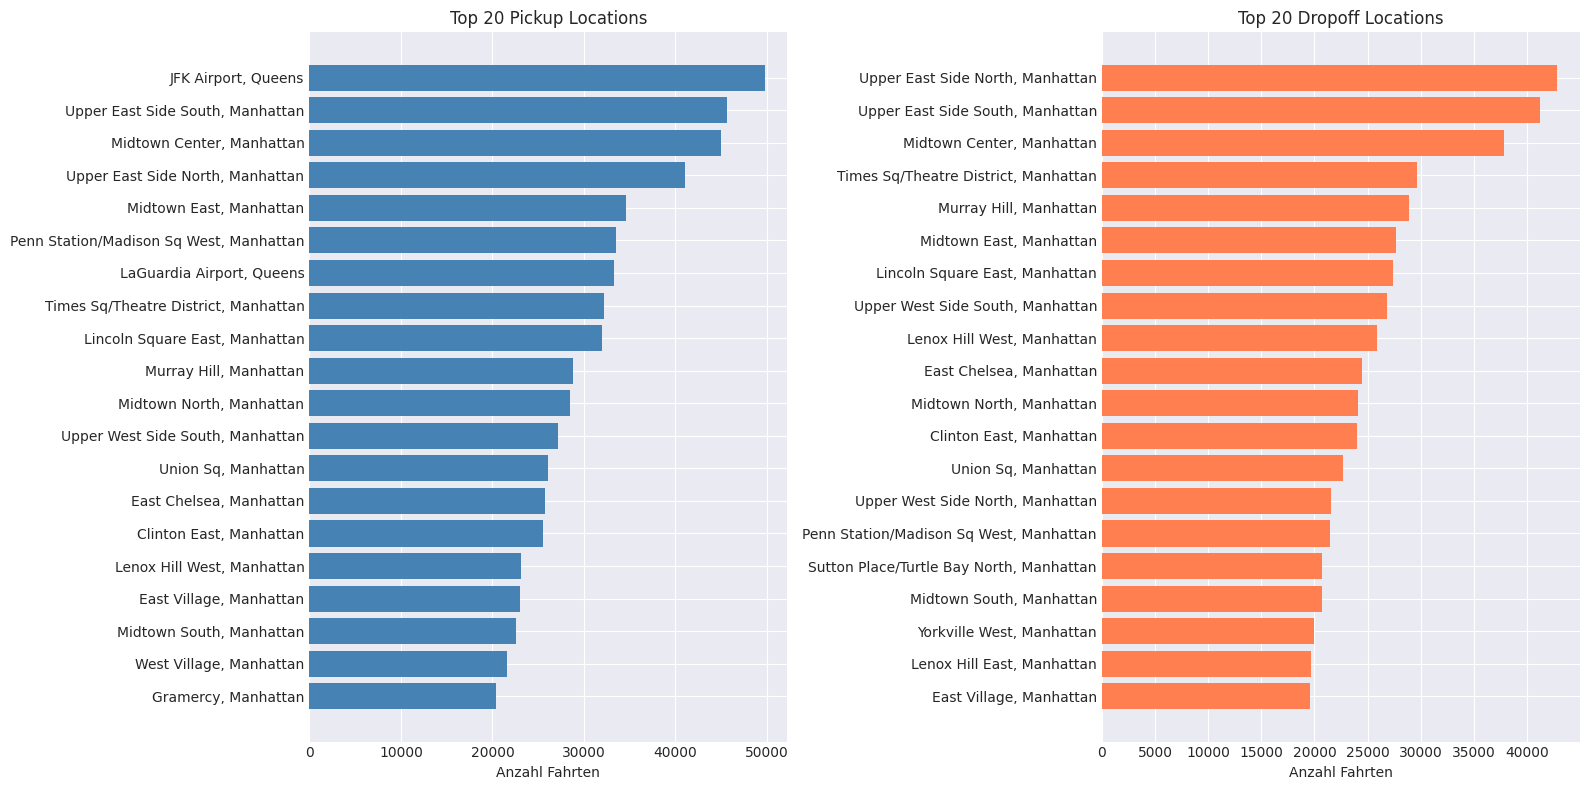

In [103]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

axes[0].barh(range(len(pickup_with_zones)), pickup_with_zones['count'], color='steelblue')
axes[0].set_yticks(range(len(pickup_with_zones)))
axes[0].set_yticklabels([f"{row['Zone']}, {row['Borough']}" for _, row in pickup_with_zones.iterrows()])
axes[0].set_xlabel('Anzahl Fahrten')
axes[0].set_title('Top 20 Pickup Locations')
axes[0].invert_yaxis()

axes[1].barh(range(len(dropoff_with_zones)), dropoff_with_zones['count'], color='coral')
axes[1].set_yticks(range(len(dropoff_with_zones)))
axes[1].set_yticklabels([f"{row['Zone']}, {row['Borough']}" for _, row in dropoff_with_zones.iterrows()])
axes[1].set_xlabel('Anzahl Fahrten')
axes[1].set_title('Top 20 Dropoff Locations')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


## Verteilungsanalyse

Empirische vs. theoretische Verteilungen

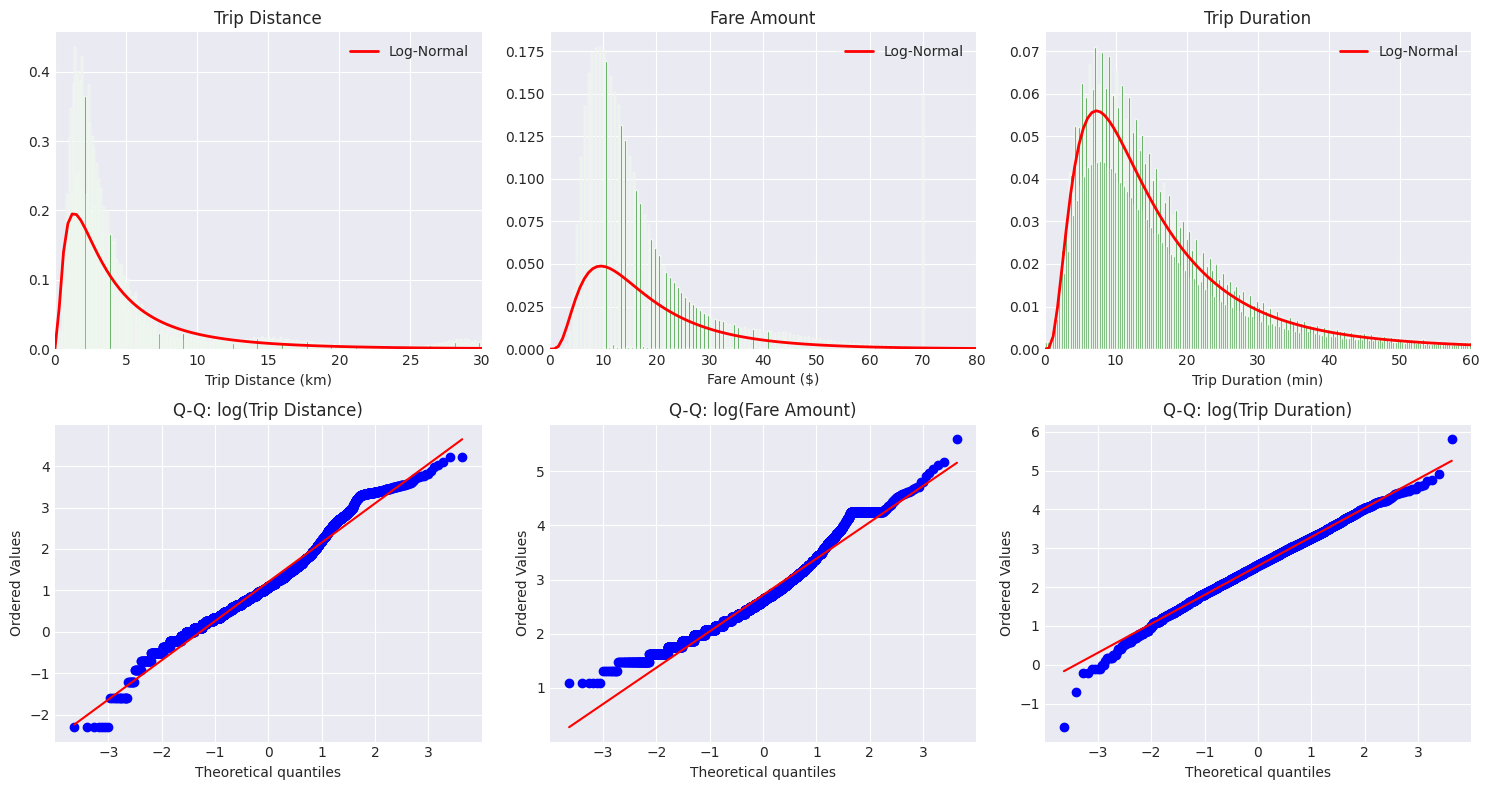

In [109]:
from scipy.stats import expon, lognorm, norm

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Trip Distance - Log-Normal
data = df['trip_distance']
data_filtered = data[data <= 30]
axes[0, 0].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 30, 100)
axes[0, 0].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[0, 0].set_xlabel('Trip Distance (km)')
axes[0, 0].set_xlim(0, 30)
axes[0, 0].set_title('Trip Distance')
axes[0, 0].legend()

# Fare Amount - Log-Normal
data = df['fare_amount']
data_filtered = data[data <= 80]
axes[0, 1].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 80, 100)
axes[0, 1].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[0, 1].set_xlabel('Fare Amount ($)')
axes[0, 1].set_xlim(0, 80)
axes[0, 1].set_title('Fare Amount')
axes[0, 1].legend()

# Trip Duration - Log-Normal
data = df['trip_duration']
data_filtered = data[data <= 60]
axes[0, 2].hist(data_filtered, bins='fd', density=True, alpha=0.85, edgecolor='white', color='green')
shape, loc, scale = lognorm.fit(data, floc=0)
x = np.linspace(0, 60, 100)
axes[0, 2].plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', lw=2, label='Log-Normal')
axes[0, 2].set_xlabel('Trip Duration (min)')
axes[0, 2].set_xlim(0, 60)
axes[0, 2].set_title('Trip Duration')
axes[0, 2].legend()

# Q-Q Plots
stats.probplot(np.log(df['trip_distance'].sample(min(5000, len(df)))), dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q: log(Trip Distance)')

stats.probplot(np.log(df['fare_amount'].sample(min(5000, len(df)))), dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q: log(Fare Amount)')

stats.probplot(np.log(df['trip_duration'].sample(min(5000, len(df)))), dist="norm", plot=axes[1, 2])
axes[1, 2].set_title('Q-Q: log(Trip Duration)')

plt.tight_layout()
plt.show()